# Math 607 Applied Math I: Week 3 Homework

Due date: Thursday, Oct 21.

Please submit your solutions by upload on Canvas.

It's absolutely OK if you work together on these problems - and this is especially true for the programming problems, when encourage you to work in pairs at one computer, with one person typing and one person thinking.

We do want everyone to write up each assignment on their own.

# 1. $d$-regular eigenvalues

Recall that the *adjacency matrix* $A$ of an undirected graph is the matrix with $A_{ij} = 1$ if there is an edge between $i$ and $j$ in the graph, and $A_{ij} = 0$ otherwise.
A $d$*-regular* graph is one for which the degree of every vertex is exactly $d$.

*a.* Show that the adjacency matrix of the *complete graph* on $n$ vertices (i.e., the $(n-1)$-regular graph)
    has two eigenvalues: $n-1$, with multiplicity 1, and $-1$, with multiplicity $n-1$.
    
*b.* Show that the adjacency matrix of any $d$-regular graph has an eigenspace with eigenvalue $d$. What determines the dimension of this eigenspace?

# 2. Uniform spanning trees

One way to sample a uniform spanning tree of a graph $G$
is the *Aldous-Broder* algorithm: choose a vertex $r$ of $G$ and perform a random walk on $G$, starting at $r$,
until every vertex has been visited.
For each vertex $w \neq r$, remember the edge that was traversed by
the walk on it's first visit to $w$.
These edges are the uniform spanning tree.
(For simplicity, we're dealing with an unweighted graph -
all weights are 1 - and the "random walk on a graph"
is the one that, at each time step, chooses a random edge
incident to the vertex it's currently at
to move along.)

**(a)** Implement the Aldous-Broder algorithm on the $m \times n$ grid.

**(b)** Plot an example or two on a 30x40 grid.
(It may be helpful to look at the plotting code [here](https://uo-applied-math.github.io/applied_math/2019/demos/random_spanning_tree.html).

**(c)** How many spanning trees *are* there of the 30x40 grid?

In [67]:
import numpy as np
rng = np.random.default_rng(seed=31)

In [68]:
m = 3
n = 2

In [69]:
all_nodes = [(i, j) for i in range(m) for j in range(n)]

In [70]:
print(all_nodes)

[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]


In [71]:
import numpy as np

def possible_steps(node, m, n):
    steps = np.array([[0,1],[0,-1],[-1,0],[1,0]])
    possibilities = node + steps
    allowed = ((possibilities[:,0] >= m) + 
                   (possibilities[:,0] < 0) + 
                   (possibilities[:,1] >= n) + 
                   (possibilities[:,1] < 0)) == 0
    return steps[allowed]

In [72]:
start = (0,1)
xy = np.array([[(0,0) for _ in range(n)] for _ in range(m)])
tree = [start]
current = start
while set(tree) != set(all_nodes):
    print("old: ", current)
    steps = possible_steps(current,m,n)
    step = rng.choice(steps)
    current = tuple(current+step)
    print("new: ",current)
    if current not in tree:
        tree.append(current)
        xy[current] = -step
        print("forward step: ", step)
        print("back step: ", -step)

old:  (0, 1)
new:  (1, 1)
forward step:  [1 0]
back step:  [-1  0]
old:  (1, 1)
new:  (2, 1)
forward step:  [1 0]
back step:  [-1  0]
old:  (2, 1)
new:  (2, 0)
forward step:  [ 0 -1]
back step:  [0 1]
old:  (2, 0)
new:  (2, 1)
old:  (2, 1)
new:  (1, 1)
old:  (1, 1)
new:  (2, 1)
old:  (2, 1)
new:  (2, 0)
old:  (2, 0)
new:  (2, 1)
old:  (2, 1)
new:  (2, 0)
old:  (2, 0)
new:  (1, 0)
forward step:  [-1  0]
back step:  [1 0]
old:  (1, 0)
new:  (2, 0)
old:  (2, 0)
new:  (2, 1)
old:  (2, 1)
new:  (2, 0)
old:  (2, 0)
new:  (2, 1)
old:  (2, 1)
new:  (1, 1)
old:  (1, 1)
new:  (1, 0)
old:  (1, 0)
new:  (2, 0)
old:  (2, 0)
new:  (1, 0)
old:  (1, 0)
new:  (0, 0)
forward step:  [-1  0]
back step:  [1 0]


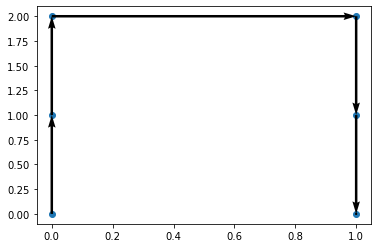

In [81]:
import matplotlib
import matplotlib.pyplot as plt

points = np.array([[i, j] for i in range(m) for j in range(n)])

fig, ax = plt.subplots()
ax.scatter(points[:, 1], points[:, 0])
ax.quiver(np.arange(n), np.arange(m),
          xy[:,:,1], xy[:,:,0], scale_units='xy', angles='xy', scale=1)

In [15]:
all_nodes

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [ ]:
nodes_map.keys()

In [ ]:
steps = np.array([[0,1],[0,-1],[-1,0],[1,0]])

In [ ]:
list(nodes_map.keys())[0] + steps

In [ ]:
possibilities = nodes[1] + steps
possibilities

In [ ]:
tuple(possibilities[allowed][0,])

In [ ]:
np.equal(nodes, possibilities[allowed])

In [ ]:
np.where(nodes, possibilities[allowed])

In [ ]:


def gen_adj_grid(m,n):
    nodes = [(x,y) for x in range(m) for y in range(n)]
    nodes_map = {node: i for i, node in enumerate(nodes)}
    #print(nodes_map)
    A = np.zeros((m*n,m*n))
    for node, i in nodes_map.items():
        #print(node, i)
        steps = allowed_steps(node,m,n)
        #print(steps)
        for step in steps:
            #print(step)
            A[i,nodes_map[tuple(step)]] = 1

    return(A, nodes_map)

In [ ]:
A, nodes_map = gen_adj_grid(30,40)

In [ ]:
A.shape

In [ ]:
def graph_laplacian(A):
    L = np.zeros(shape=A.shape)
    for i in range(len(A)):
        for j in range(len(A)):
            if A[i,j] == 1:
                if i <= j:
                    L[i,j]  =  np.sum(A[i,:])
                else :
                    L[i,j] = -1
    return L

In [ ]:
L = graph_laplacian(A)

In [ ]:
L2 = networkx.linalg.laplacianmatrix.laplacian_matrix(networkx.convert_matrix.from_numpy_matrix(A))

In [ ]:
import scipy

In [ ]:
L2 = scipy.sparse.csr_matrix.toarray(L2)

In [ ]:
L2

In [ ]:
L3 = np.diag(np.sum(A,axis=1)) - A

In [ ]:
L = graph_laplacian(A)

In [ ]:
L

In [ ]:
np.linalg.det(L3[:-1,:-1])

In [ ]:
L3v = np.delete(L, 3, axis=1)
L3v = np.delete(L3v, 3, axis=0)

In [ ]:
np.linalg.det(L3[:-1,:-1])

In [ ]:
np.linalg.det(L[:-1,:-1])

# 3. The Ising model

Use the Metropolis-Hastings algorithm to sample from the Ising model's
distribution, and plot the results on a 100x100 grid at $T=0.01$.
Explain carefully why your algorithm works.
Here is some skeleton code to do this:

In [ ]:
class Ising(object):
    
    def __init__(self, n, m):
        self.n = n
        self.m = m
        self.state = np.random.choice([-1, 1], n*m).reshape((n, m))
    
    def plot(self):
        fig, ax = plt.subplots()
        ax.set_aspect(1)
        xy = np.array([[a, b] for a in range(self.n) for b in range(self.m)])
        fills = ['black' if (s == 1) else 'white' for s in self.state.reshape((self.n*self.m,))]
        ax.scatter(xy[:,0], xy[:,1], c=fills, marker="8", s=5)
    
    def update(self, T):
        ## FILL ME: should do one Metropolis-Hastings update step
        ## to self.state
        
        
ising = Ising(100, 100)
for _ in range(100000):
    ising.update(0.01)
ising.plot()

# 4. Random walk on a graph

Let $X$ be the random walk on an unweighted graph $G = (V,E)$,
i.e., the transition probabilities are
$\mathbb{P}\{X_{k+1} = y \;\|\; X_k=x\} = 1/\text{deg}(x)$
for $(x,y) \in E$ and 0 otherwise.


**(a)** Show that $X$ is reversible with respect to
$$ \pi(x) \propto \text{deg}(x) .$$

**(b)** Let $A$ be the adjacency matrix of the graph
and $D$ be the diagonal matrix with $D_{xx} = \text{deg}(x)$.
Show that $P = $D^{-1} A$ is the transition matrix for $X$, so
$$
  \mathbb{E}[f(X_t) \;|\; X_0 = x] = (P^t f)(x) .
$$

**(c)** How could we minimally modify the random walk
so that the stationary distribution was *uniform*?